<a href="https://colab.research.google.com/github/PiyushiAnand/FinSearch_RL/blob/main/rl_in_trading_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0 - Profit: 594524609.60
Epoch 1 - Profit: 1191605780.60
Epoch 2 - Profit: 1790553134.00
Epoch 3 - Profit: 2390219745.20
Epoch 4 - Profit: 2986290067.40
Epoch 5 - Profit: 3577014554.60
Epoch 6 - Profit: 4161401797.40
Epoch 7 - Profit: 4744603236.80
Epoch 8 - Profit: 5332683965.60
Epoch 9 - Profit: 5931359167.40
Epoch 10 - Profit: 6541250903.00
Epoch 11 - Profit: 7149082062.20
Epoch 12 - Profit: 7755785736.20
Epoch 13 - Profit: 8336537811.20
Epoch 14 - Profit: 8895634394.60
Epoch 15 - Profit: 9439198897.40
Epoch 16 - Profit: 9963537833.60
Epoch 17 - Profit: 10486652087.60
Epoch 18 - Profit: 11001310202.60
Epoch 19 - Profit: 11527145972.60
Epoch 20 - Profit: 12055411667.60
Epoch 21 - Profit: 12590150682.80
Epoch 22 - Profit: 13139488687.40
Epoch 23 - Profit: 13689604268.00
Epoch 24 - Profit: 14238417408.80
Epoch 25 - Profit: 14787541580.00
Epoch 26 - Profit: 15346268814.80
Epoch 27 - Profit: 15904024079.60
Epoch 28 - Profit: 16473462423.80
Epoch 29 - Profit: 17043289556.00
Epoch 30

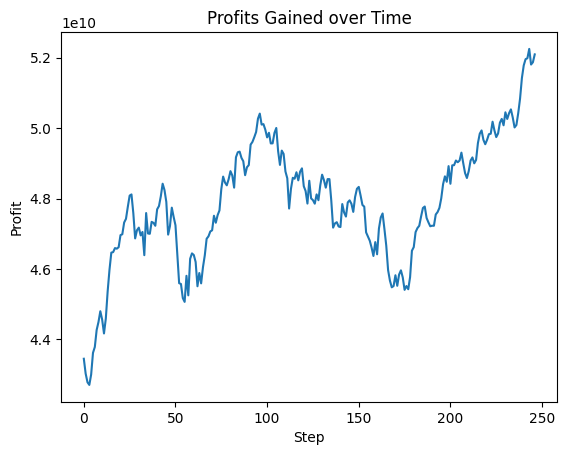

In [46]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import random
import matplotlib.pyplot as plt

# Load the stock prices data into a Pandas DataFrame.
data = pd.read_excel("nifty50.xlsx")

# Create a Q-table, which is a table that stores the Q-values for each state-action pair.
num_states = data.shape[0]
num_actions = 2
q_table = torch.zeros((num_states, num_actions))  # Corrected dimensions
shares=0
# Initialize the Q-table with random values.
q_table = nn.init.xavier_uniform_(q_table)

# Define the epsilon-greedy policy, which is a policy that selects an action with a probability of epsilon and the greedy action with a probability of 1-epsilon.
def epsilon_greedy_policy(state, q_table, epsilon):
    if random.random() < epsilon:
        action = random.randint(0, num_actions - 1)
    else:
        action = torch.argmax(q_table[state])
    return action

# Define the Bellman equation, which updates the Q-values for each state-action pair.
def bellman_equation(state, action, reward, next_state_index, q_table):
    if next_state_index < num_states:
        next_state = torch.tensor([next_state_index])
        target = reward + gamma * torch.max(q_table[next_state])
    else:
        target = reward
    q_table[state, action] = target


# Create a training loop that iterates over the stock prices data and updates the Q-table using the Bellman equation.
num_epochs = 100
epsilon = 0.05
gamma = 0.99
for i in range(num_epochs):
    for state in range(num_states):
        action = epsilon_greedy_policy(state, q_table, epsilon)
        reward = data.iloc[state, 4]
        next_state_index = state + 1
        bellman_equation(state, action, reward, next_state_index, q_table)
        profits = trading_algorithm(q_table)
        last_profit = profits[-1]
    print(f"Epoch {i} - Profit: {last_profit:.2f}")

# Implement the trading algorithm.
profits=[]
def trading_algorithm(q_table):
    global shares
    portfolio = 10000
    for state in range(num_states):
        action = epsilon_greedy_policy(state, q_table, 0)
        if action == 1:
            shares += 1


        profit = data.iloc[state, 4] * shares - 10000  # Calculate profit by subtracting the initial portfolio value
        profits.append(profit)



    return profits

# Visualize the results by showing the profits gained over time.
profits = trading_algorithm(q_table)
plt.plot(profits)
plt.xlabel('Step')
plt.ylabel('Profit')
plt.title('Profits Gained over Time')
plt.show()